In [1]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ninjaxpress_batam.csv')
#only keep caption column 
df1 = df[['caption']]
df1 = df1.dropna()

In [3]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [4]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_53348/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [5]:
df1 = df1.rename(columns={'reviews': 'Ninjavan ID Reviews'})
df1

,index,caption,middle,Ninjavan TH Reviews
0,0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,...",NaN,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,..."
1,1,Saya berkomentar disini karena smua kurir dan ...,NaN,Saya berkomentar disini karena smua kurir dan ...
2,3,(Translated by Google) CS call center on behal...,CS call center on behalf of Novi and Agung is...,CS call center on behalf of Novi and Agung is...
3,4,(Translated by Google) It's outrageous that th...,It's outrageous that the ninja company's cour...,It's outrageous that the ninja company's cour...
4,6,"(Translated by Google) Good morning, I apologi...","Good morning, I apologize in advance that I h...","Good morning, I apologize in advance that I h..."
...,...,...,...,...
722,917,(Translated by Google) the communication agent...,the communication agent is good and the respo...,the communication agent is good and the respo...
723,922,(Translated by Google) Fast delivery. As fast ...,Fast delivery. As fast as a ninja ... (Original,Fast delivery. As fast as a ninja ...
724,927,"(Translated by Google) Thank you, my order nin...","Thank you, my order ninja van arrived (Original","Thank you, my order ninja van arrived"
725,928,(Translated by Google) NinjaExspres is very th...,NinjaExspres is very thankful ... NinjaExpres...,NinjaExspres is very thankful ... NinjaExpres...


In [6]:
df1['Ninjavan ID Reviews'].to_csv('ninjavanID1.csv')

### Run 2nd csv

In [7]:
df2 = pd.read_csv('ninjaxpress_ID.csv')

In [8]:
df2 = df2[['caption']]

df2 = df2.dropna()

df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [9]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_53348/2674474058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [10]:
df2 = df2.rename(columns={'reviews': 'Ninjavan ID Reviews'})
df2['Ninjavan ID Reviews'].to_csv('ninjavanID2.csv')

### Combining files together 

In [11]:
files = os.path.join("ninjavanID*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_ninjavanID.csv")

### Clean the data

In [12]:
df_combi = pd.read_csv('combined_ninjavanID.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['clean_1'] = pd.DataFrame(df_combi['Ninjavan ID Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,Ninjavan TH Reviews,clean_1
0,0,0,"WORST DELIVERY, THE PACKAGE WAS BROUGHT BY TH...",worst delivery package brought courier status ...
1,1,1,I'm commenting here because all couriers and ...,im commenting couriers courier superiors cente...
2,2,2,CS call center on behalf of Novi and Agung is...,cs call center behalf novi agung good handling...
3,3,3,It's outrageous that the ninja company's cour...,outrageous ninja companys courier salary paid ...
4,4,4,"Good morning, I apologize in advance that I h...",good morning apologize advance something say d...
...,...,...,...,...
1506,1506,722,the communication agent is good and the respo...,communication agent good response fast ...
1507,1507,723,Fast delivery. As fast as a ninja ...,fast delivery fast ninja
1508,1508,724,"Thank you, my order ninja van arrived",thank order ninja van arrived
1509,1509,725,NinjaExspres is very thankful ... NinjaExpres...,ninjaexspres thankful ninjaexpres tehbest ...


### Sentiment analysis 


In [13]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['clean_2'] = pd.DataFrame(df_combi['clean_1'].apply(clean_text_round2))


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['Ninjavan ID Reviews'].apply(sentiment_scores))

In [15]:
df_combi

,Unnamed: 0,Unnamed: 0.1,Ninjavan TH Reviews,clean_1,clean_2,sentiment
0,0,0,"WORST DELIVERY, THE PACKAGE WAS BROUGHT BY TH...",worst delivery package brought courier status ...,worst delivery package brought courier status ...,Negative
1,1,1,I'm commenting here because all couriers and ...,im commenting couriers courier superiors cente...,im commenting courier courier superior center ...,Negative
2,2,2,CS call center on behalf of Novi and Agung is...,cs call center behalf novi agung good handling...,c call center behalf novi agung good handling ...,Negative
3,3,3,It's outrageous that the ninja company's cour...,outrageous ninja companys courier salary paid ...,outrageous ninja company courier salary paid t...,Negative
4,4,4,"Good morning, I apologize in advance that I h...",good morning apologize advance something say d...,good morning apologize advance something say d...,Positive
...,...,...,...,...,...,...
1506,1506,722,the communication agent is good and the respo...,communication agent good response fast ...,communication agent good response fast ...,Positive
1507,1507,723,Fast delivery. As fast as a ninja ...,fast delivery fast ninja,fast delivery fast ninja,Neutral
1508,1508,724,"Thank you, my order ninja van arrived",thank order ninja van arrived,thank order ninja van arrived,Positive
1509,1509,725,NinjaExspres is very thankful ... NinjaExpres...,ninjaexspres thankful ninjaexpres tehbest ...,ninjaexspres thankful ninjaexpres tehbest ...,Positive


In [16]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg = df_neg[['clean_2']]
df_neg

,clean_2
0,worst delivery package brought courier status ...
1,im commenting courier courier superior center ...
2,c call center behalf novi agung good handling ...
3,outrageous ninja company courier salary paid t...
6,disappointed untrustworthy used ninja express ...
...,...
1499,disappointed paketan week ago even though live...
1501,item pick already day confirmation left teleph...
1502,ive using messenger long time disappointed ord...
1503,ninja bad dont ever use ninja pelapak bl selle...


In [18]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['clean_2'].str.cat(sep=' ')

In [19]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 590),
 ('package', 305),
 ('ninja', 263),
 ('service', 233),
 ('day', 177),
 ('bad', 176),
 ('courier', 155),
 ('time', 147),
 ('delivery', 141),
 ('good', 130),
 ('expedition', 120),
 ('arrived', 115),
 ('use', 102),
 ('disappointed', 98),
 ('even', 98),
 ('really', 90),
 ('sent', 84),
 ('item', 83),
 ('long', 76),
 ('though', 74),
 ('using', 73),
 ('express', 68),
 ('arrive', 68),
 ('send', 67),
 ('week', 67),
 ('jakarta', 65),
 ('want', 62),
 ('didnt', 58),
 ('status', 57),
 ('one', 57),
 ('c', 52),
 ('hasnt', 52),
 ('dont', 52),
 ('already', 51),
 ('please', 50),
 ('slow', 50),
 ('come', 48),
 ('first', 46),
 ('shipping', 46),
 ('received', 45),
 ('worst', 44),
 ('like', 44),
 ('order', 44),
 ('customer', 42),
 ('still', 40),
 ('disappointing', 40),
 ('always', 39),
 ('recipient', 38),
 ('pickup', 38),
 ('call', 37),
 ('address', 37),
 ('lost', 36),
 ('seller', 35),
 ('also', 34),
 ('yet', 32),
 ('pick', 32),
 ('many', 31),
 ('doesnt', 30),
 ('lazada', 30),
 ('star', 30),


In [20]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

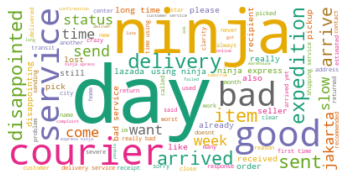

In [46]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=95, random_state=59, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

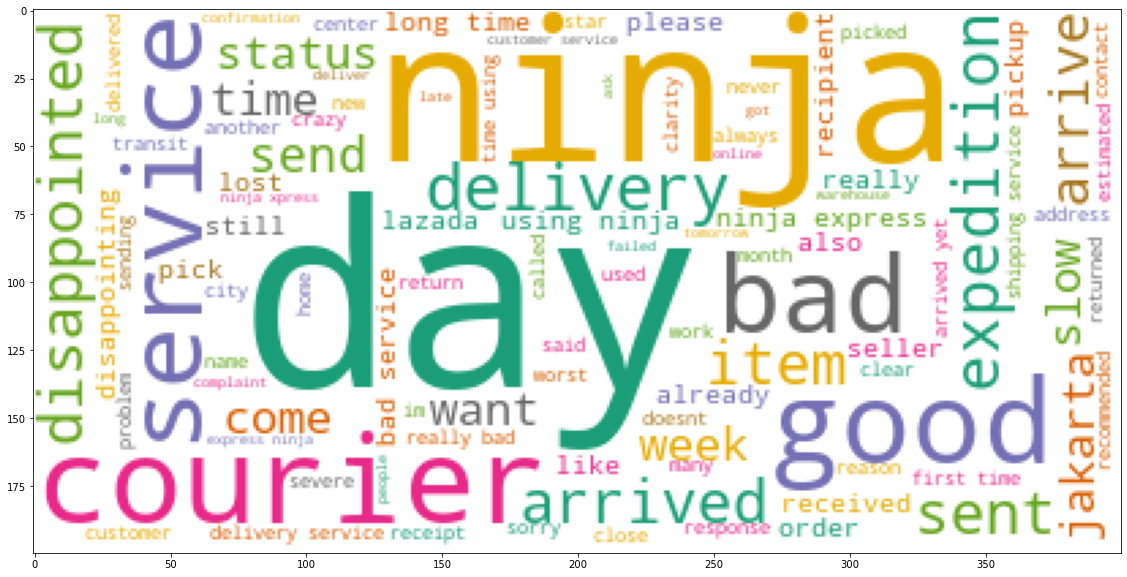

In [47]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [48]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['clean_2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'clean_2':'Late reviews'})

In [49]:
df_late.to_csv('Late_reviews_ninjaID.csv')